Changed  16  missing values to -1
----------------------------------------------
uniformity_cell_shape is dropped
----------------------------------------------
FOR N =  1
Average accuracy =  0.8656056587091071
FOR N =  2
Average accuracy =  0.8441153354946458
FOR N =  3
Average accuracy =  0.8684423813734158
FOR N =  4
Average accuracy =  0.8826996758031241
FOR N =  5
Average accuracy =  0.9127492877492878
FOR N =  6
Average accuracy =  0.8884222418705177
FOR N =  7
Average accuracy =  0.917022792022792
FOR N =  8
Average accuracy =  0.902716376854308
FOR N =  9
Average accuracy =  0.9069653207584242
FOR N =  10
Average accuracy =  0.9141492288044012
FOR N =  11
Average accuracy =  0.9083652618135377
FOR N =  12
Average accuracy =  0.9127124471952057
FOR N =  13
Average accuracy =  0.9241330189606051
FOR N =  14
Average accuracy =  0.9212840161116023
FOR N =  15
Average accuracy =  0.9226839571667157
FOR N =  16
Average accuracy =  0.9241330189606051
FOR N =  17
Average accuracy =  0.

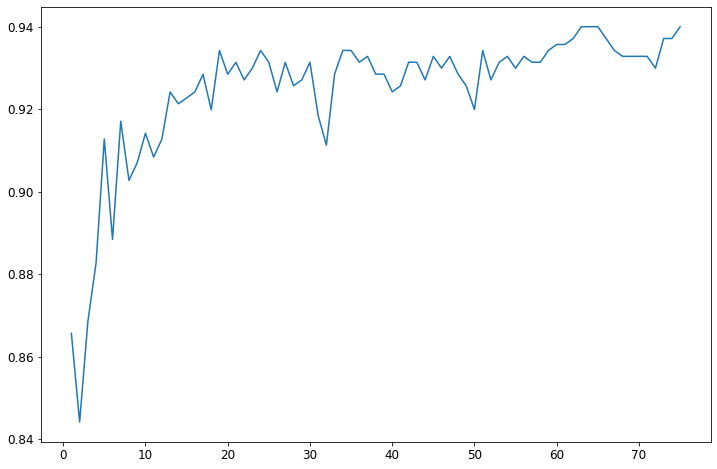

In [19]:
from preProcess import preProcess
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from testResults import testResults
from decisionTree import decisionTree
import numpy as np
import operator

class randomForest:
    def __init__(self, criterion='entropy', n_trees=10 ,max_depth = None, min_samples_split=2, n_features='log2'):
        np.random.seed(49)
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.n_trees = n_trees
        self.trees = [None] * self.n_trees
        
    def fit(self, dataset):
        if self.n_features=='log2':
            self.n_features = int(np.log2(dataset.shape[1]-1))
        elif self.n_features=='sqrt':
            self.n_features = int(np.sqrt(dataset.shape[1]-1))
        for i in range(self.n_trees):
            self.trees[i] = self.buildTree(dataset)
        
    def buildTree(self, dataset):
        dt = decisionTree(self.criterion, self.max_depth, self.min_samples_split)
        random_locations = np.random.permutation(len(dataset))
        random_features = np.random.permutation(len(dataset[0])-1)[:self.n_features]
        new_dataset = []
        for i in range(len(dataset)):
            if i in random_locations:
                sample = dataset[i]
                newSample = []
                for j in range(0, len(dataset[0])-1):
                    if j in random_features:
                        newSample.append(sample[j])
                newSample.append(sample[-1])
            new_dataset.append(newSample)
        dt.fit(np.array(new_dataset))
        return dt
    
    def predict(self, groups):
        results = []
        for group in groups:
            results.append(self.predict_single(group))
        return np.array(results)
    
    def predict_single(self, x):
        labelCounts = {2:0, 4:0}
        for dt in self.trees:
            labelCounts[dt.predict_single(x)]+=1
        return max(labelCounts.items(), key=operator.itemgetter(1))[0]

#change n_trees parameter and n_features('log2' or 'sqrt') to find optimal accuracy
if __name__ == '__main__':
    preProcessData = preProcess()
    preProcessData.handle_missing_values()
    preProcessData.handle_highly_correlated_features()
    df = preProcessData.return_df()
    # RF = randomForest(n_features='log2', n_trees=30)
    # kFold = KFold(6, True, 1)
    # values = df.values
    # for train, test in kFold.split(values):
    #     print("Taking %d train datapoints" % len(train))
    #     train_x = values[train]
    #     test_x, test_y = values[test][:,:-1], values[test][:,-1]
    #     RF.fit(train_x)
    #     pred_y = RF.predict(test_x)
    #     results = testResults(pred_y, test_y)
    #     print("Accuracy of model is ", results.return_accuracy())
    #     print('F Score of model is ', results.return_fscore())
    #     print("Confusion matrix:\n", confusion_matrix(test_y, pred_y))
    #     print()
    c = 76
    accs = []
    counts = range(1,c)
    for i in range(1,c):
        print("FOR N = ", i)
        RF = randomForest(n_features='log2', n_trees=i)
        avg_acc = 0
        kFold = KFold(6, True, 1)
        values = df.values
        for train, test in kFold.split(values):
            # print("Taking %d train datapoints" % len(train))
            train_x = values[train]
            test_x, test_y = values[test][:,:-1], values[test][:,-1]
            RF.fit(train_x)
            pred_y = RF.predict(test_x)
            results = testResults(pred_y, test_y)
            avg_acc += results.return_accuracy()
            # print("Accuracy of model is ", results.return_accuracy())
            # print('F Score of model is ', results.return_fscore())
            # print("Confusion matrix:\n", confusion_matrix(test_y, pred_y))
            # print()
        print("Average accuracy = ", str(avg_acc/6.0))
        accs.append(avg_acc/6.0)
    

    
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure()
    plt.plot(counts, accs)
    plt.xlabel = "Number of random forests"
    plt.ylabel = "Accuracy"
    fig.savefig("test.jpg")
